In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import wordcloud

import warnings
from collections import Counter
import datetime
import json
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')
# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
%matplotlib notebook
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [2]:
df = pd.read_csv('/Users/zhujinghong/Downloads/5003 project/pre_data/US_pre.csv')

In [3]:
df.head()

category_id trending_date  \
0           10      18.30.01   
1           22      18.03.01   
2           24      17.10.12   
3           27      18.03.01   
4           25      17.23.11   

                                               title     channel_title  \
0  DJ Khaled, Rihanna - Wild Thoughts (2018 Live ...      Super Netvid   
1               The Queen's Christmas Broadcast 2017  The Royal Family   
2  Little Mix bring the Power & CNCO to The X Fac...   The X Factor UK   
3                    Oh What a Feeling. Toyota! 1982      Kevin Noonan   
4  Additional Remains Of Miami Gardens Soldier Re...         CBS Miami   

               publish_time  \
0  2018-01-29T03:11:56.000Z   
1  2017-12-25T15:02:43.000Z   
2  2017-12-03T19:47:01.000Z   
3  2013-05-28T00:02:49.000Z   
4  2017-11-21T17:26:32.000Z   

                                                tags    views   likes  \
0                                             [none]  3014847   42556   
1                                             [none]  2497549   51959   
2  \the x factor\"|\"x factor\"|\"X factor UK\"|\...  5275288  169795   
3                                             [none]    13630      42   
4  \CBS 4 News Morning\"|\"La David Johnson\"|\"J...     1095       8   

   dislikes  comment_count   category_title  
0      2791              0            Music  
1      6265              0   People & Blogs  
2      3706              0    Entertainment  
3         1              8        Education  
4         2             13  News & Politics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40898 entries, 0 to 40897
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category_id     40898 non-null  int64 
 1   trending_date   40898 non-null  object
 2   title           40898 non-null  object
 3   channel_title   40898 non-null  object
 4   publish_time    40898 non-null  object
 5   tags            40898 non-null  object
 6   views           40898 non-null  int64 
 7   likes           40898 non-null  int64 
 8   dislikes        40898 non-null  int64 
 9   comment_count   40898 non-null  int64 
 10  category_title  40898 non-null  object
dtypes: int64(5), object(6)
memory usage: 3.4+ MB


### Data cleaning

In [5]:
df[df["category_title"].apply(lambda x: pd.isna(x))].head(3)

Empty DataFrame
Columns: [category_id, trending_date, title, channel_title, publish_time, tags, views, likes, dislikes, comment_count, category_title]
Index: []

In [6]:
df=df.dropna(axis=0)

In [7]:
df[df["category_title"].apply(lambda x: pd.isna(x))].head(3)

Empty DataFrame
Columns: [category_id, trending_date, title, channel_title, publish_time, tags, views, likes, dislikes, comment_count, category_title]
Index: []

### Data Analysis

### tags

In [10]:
# 1、Most common words in tags
tags_words = list(df["tags"].apply(lambda x: x.split('|')))
tags_words = [x for y in tags_words for x in y]
Counter(tags_words).most_common(25)

[('\\"funny\\"', 3447),
 ('\\"comedy\\"', 2785),
 ('[none]', 1532),
 ('\\"how to\\"', 1531),
 ('\\"humor\\"', 1170),
 ('\\"music\\"', 1166),
 ('\\"2018\\"', 1128),
 ('\\"food\\"', 1082),
 ('\\"science\\"', 1054),
 ('\\"news\\"', 916),
 ('\\"vlog\\"', 906),
 ('\\"makeup\\"', 889),
 ('\\"review\\"', 888),
 ('\\"celebrity\\"', 864),
 ('\\"comedian\\"', 856),
 ('\\"tutorial\\"', 845),
 ('\\"live\\"', 840),
 ('\\"interview\\"', 810),
 ('\\"cooking\\"', 771),
 ('\\"celebrities\\"', 766),
 ('\\"video\\"', 751),
 ('\\"television\\"', 745),
 ('\\"fun\\"', 735),
 ('\\"movie\\"', 714),
 ('\\"cute\\"', 696)]

In [26]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(tags_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

<IPython.core.display.Javascript object>

### titles

In [8]:
import re
from html import unescape
 
def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [10]:
df["t1"] = df["title"].apply(lambda x: html_to_plain_text(x))
df["t1"]

0        DJ Khaled, Rihanna - Wild Thoughts (2018 Live ...
1                     The Queen's Christmas Broadcast 2017
2        Little Mix bring the Power & CNCO to The X Fac...
3                          Oh What a Feeling. Toyota! 1982
4        Additional Remains Of Miami Gardens Soldier Re...
                               ...                        
40893                   Maluma - Marinero (Official Video)
40894    BTS Plays With Puppies While Answering Fan Que...
40895              Wanna One (워너원) - 'BOOMERANG (부메랑)' M/V
40896    Official Call of Duty®: Black Ops 4 — Multipla...
40897                                        GOT7 Look M/V
Name: t1, Length: 40898, dtype: object

In [12]:
df["t2"]=df["t1"].replace('[^\w\s]','',regex=True) 
df["t2"]

0        DJ Khaled Rihanna  Wild Thoughts 2018 Live Per...
1                      The Queens Christmas Broadcast 2017
2        Little Mix bring the Power  CNCO to The X Fact...
3                            Oh What a Feeling Toyota 1982
4        Additional Remains Of Miami Gardens Soldier Re...
                               ...                        
40893                      Maluma  Marinero Official Video
40894    BTS Plays With Puppies While Answering Fan Que...
40895                      Wanna One 워너원  BOOMERANG 부메랑 MV
40896    Official Call of Duty Black Ops 4  Multiplayer...
40897                                         GOT7 Look MV
Name: t2, Length: 40898, dtype: object

In [13]:
df["t3"]=df["t2"].apply(lambda a: a.lower())
df["t3"]

0        dj khaled rihanna  wild thoughts 2018 live per...
1                      the queens christmas broadcast 2017
2        little mix bring the power  cnco to the x fact...
3                            oh what a feeling toyota 1982
4        additional remains of miami gardens soldier re...
                               ...                        
40893                      maluma  marinero official video
40894    bts plays with puppies while answering fan que...
40895                      wanna one 워너원  boomerang 부메랑 mv
40896    official call of duty black ops 4  multiplayer...
40897                                         got7 look mv
Name: t3, Length: 40898, dtype: object

In [14]:
# 2、Most common words in video titles
title_words = list(df["t3"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('the', 9998),
 ('a', 4814),
 ('to', 4281),
 ('official', 3936),
 ('in', 3358),
 ('of', 3163),
 ('video', 2859),
 ('with', 2831),
 ('on', 2364),
 ('and', 2353),
 ('2018', 2235),
 ('i', 2069),
 ('my', 2040),
 ('trailer', 1998),
 ('how', 1838),
 ('for', 1787),
 ('you', 1740),
 ('is', 1721),
 ('ft', 1300),
 ('from', 1258),
 ('at', 1132),
 ('vs', 1044),
 ('new', 1002),
 ('this', 949),
 ('what', 946)]

<IPython.core.display.Javascript object>


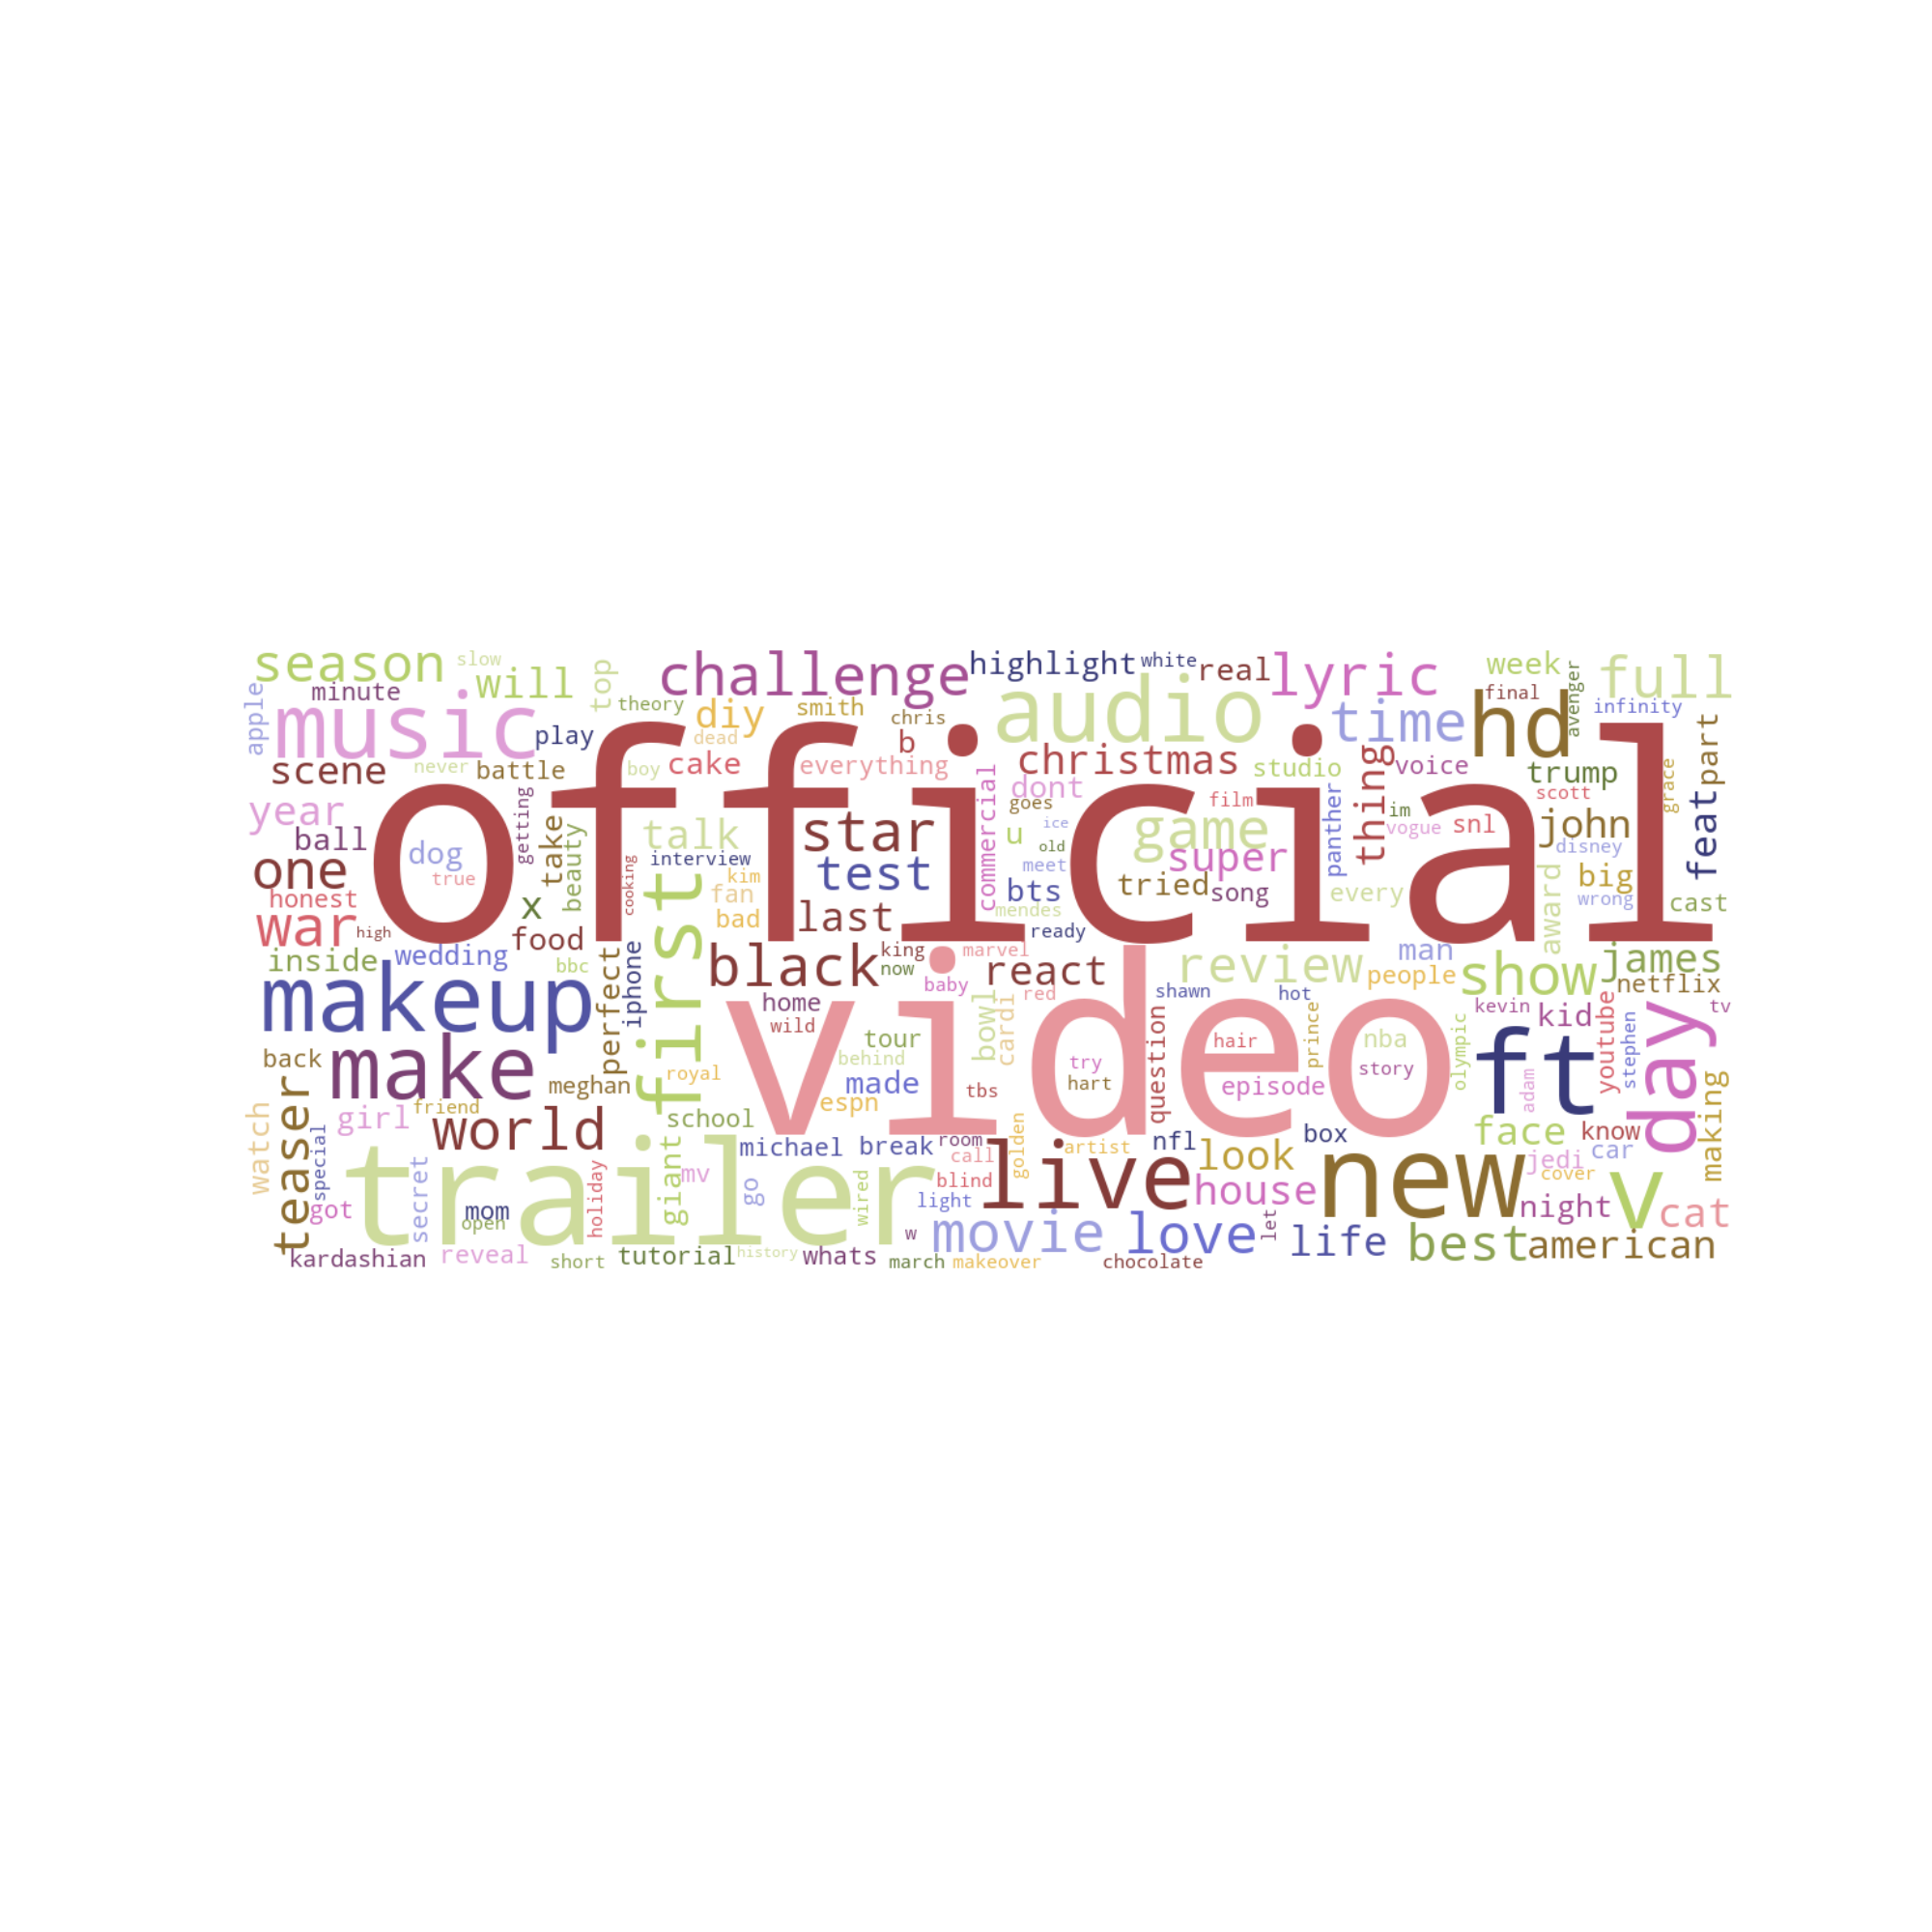

In [21]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

### titles length

In [16]:
# the lengths of trending video titles
df["title_length"] = df["title"].apply(lambda x: len(x))

<IPython.core.display.Javascript object>


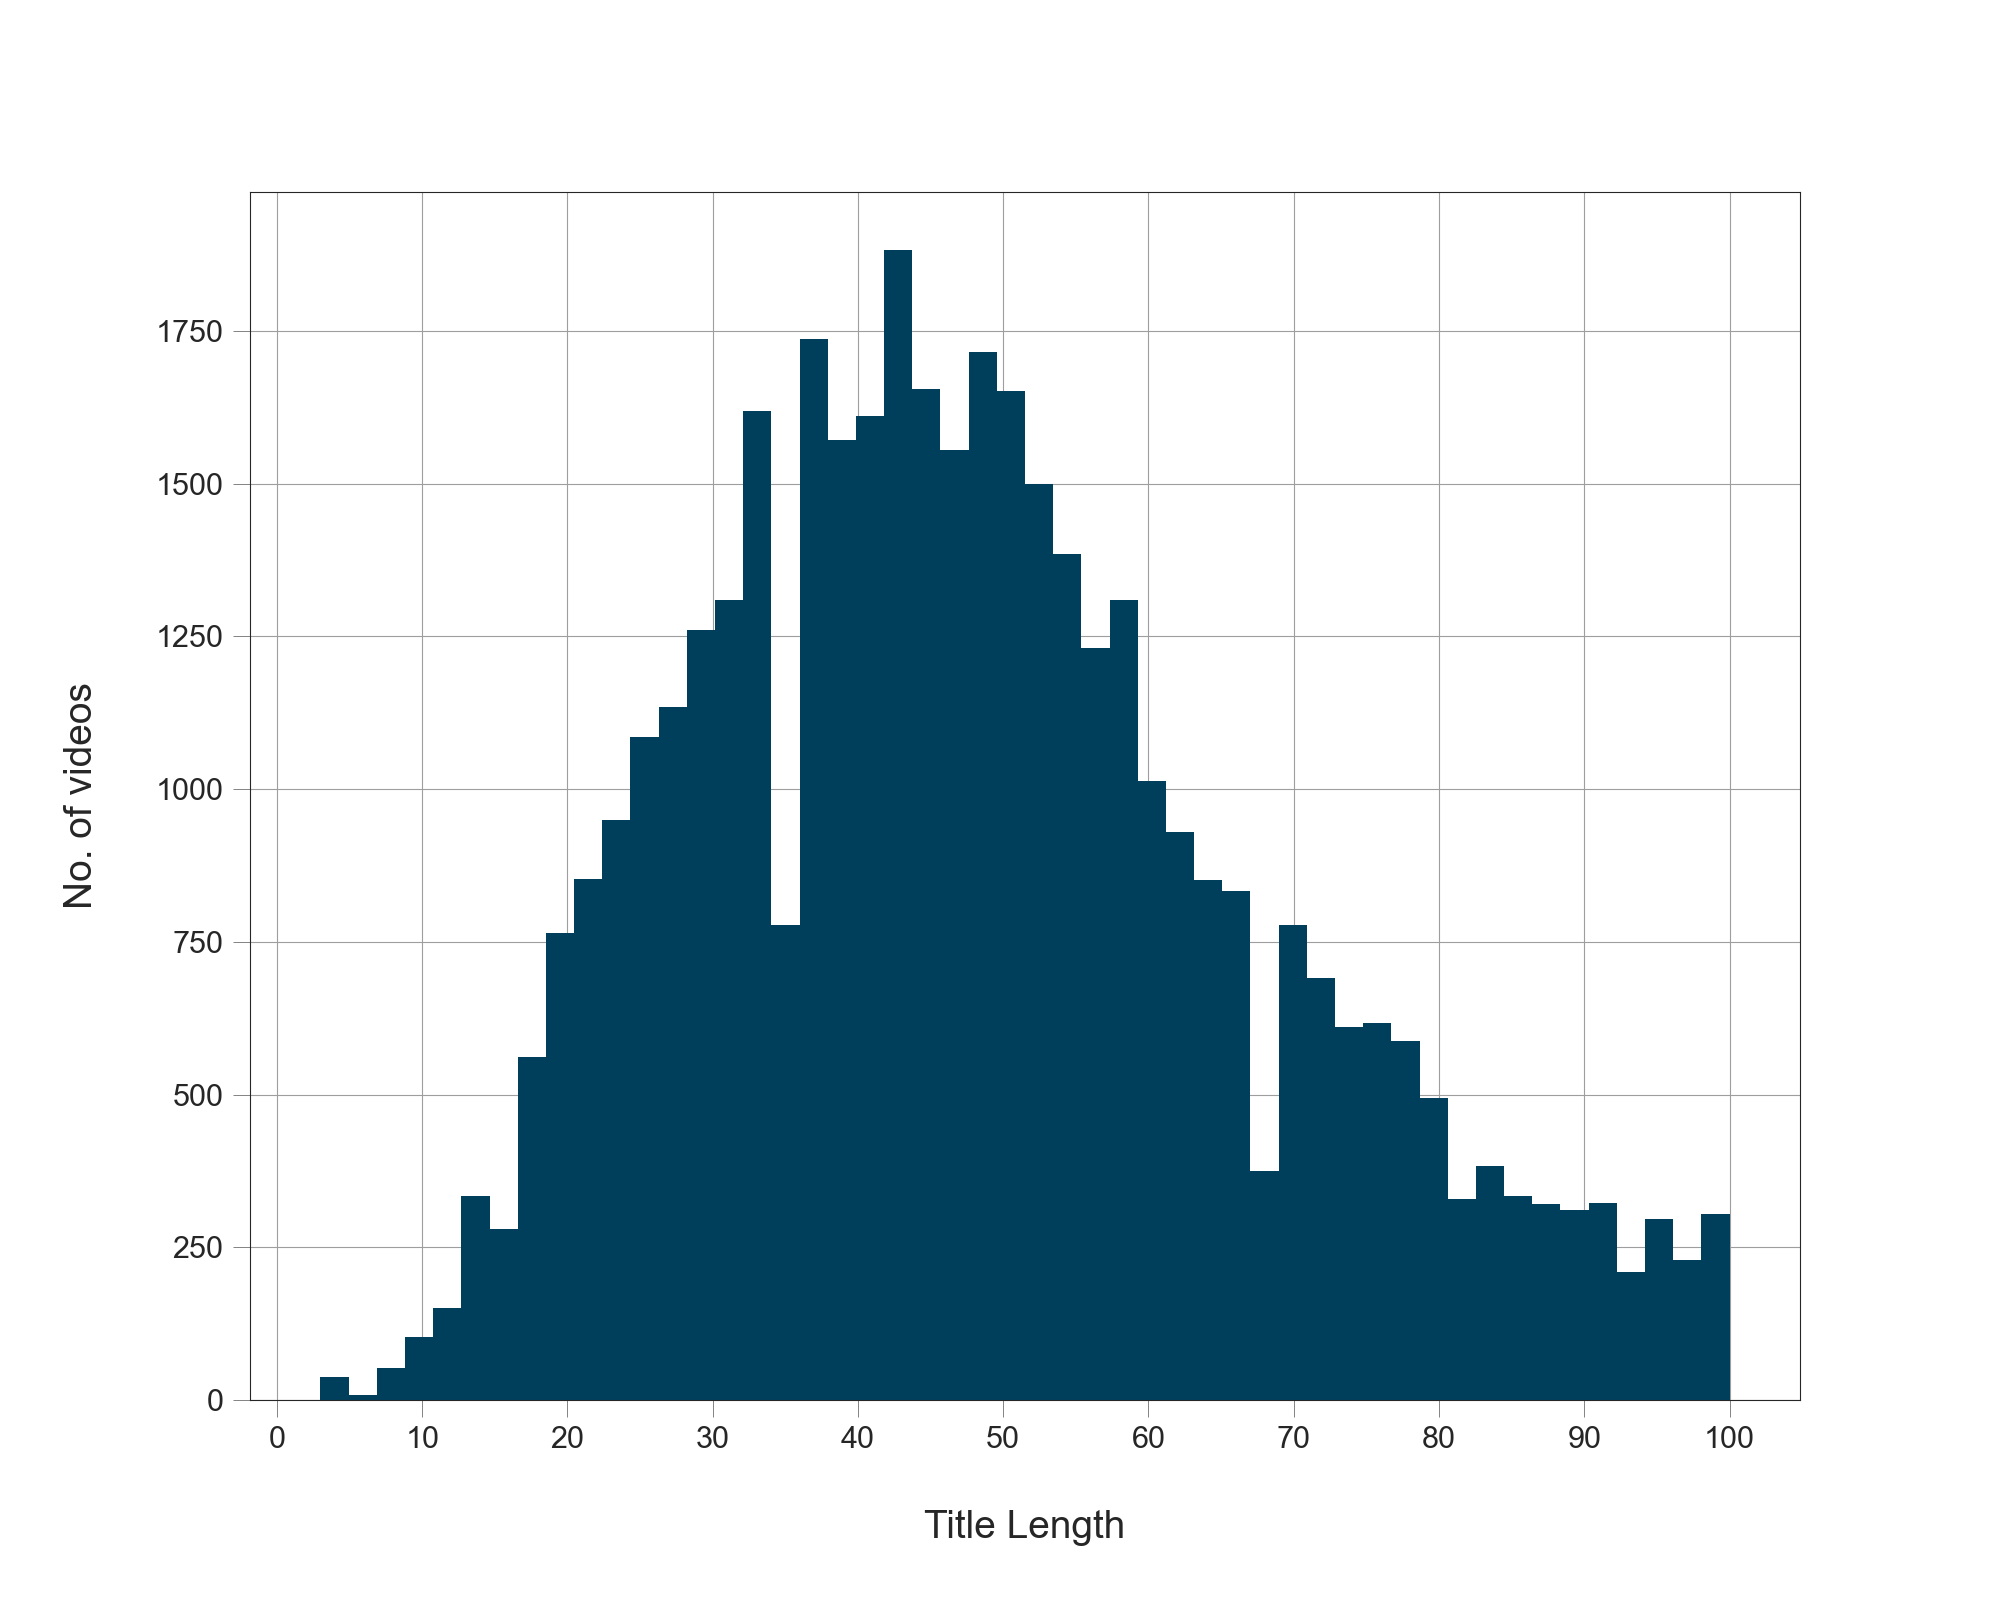

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

In [18]:
# visualize the relationship between title length and likes
fig, ax = plt.subplots(figsize=(10,6))
_ = plt.scatter( x=df['likes'],y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Title Length", xlabel="Likes")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


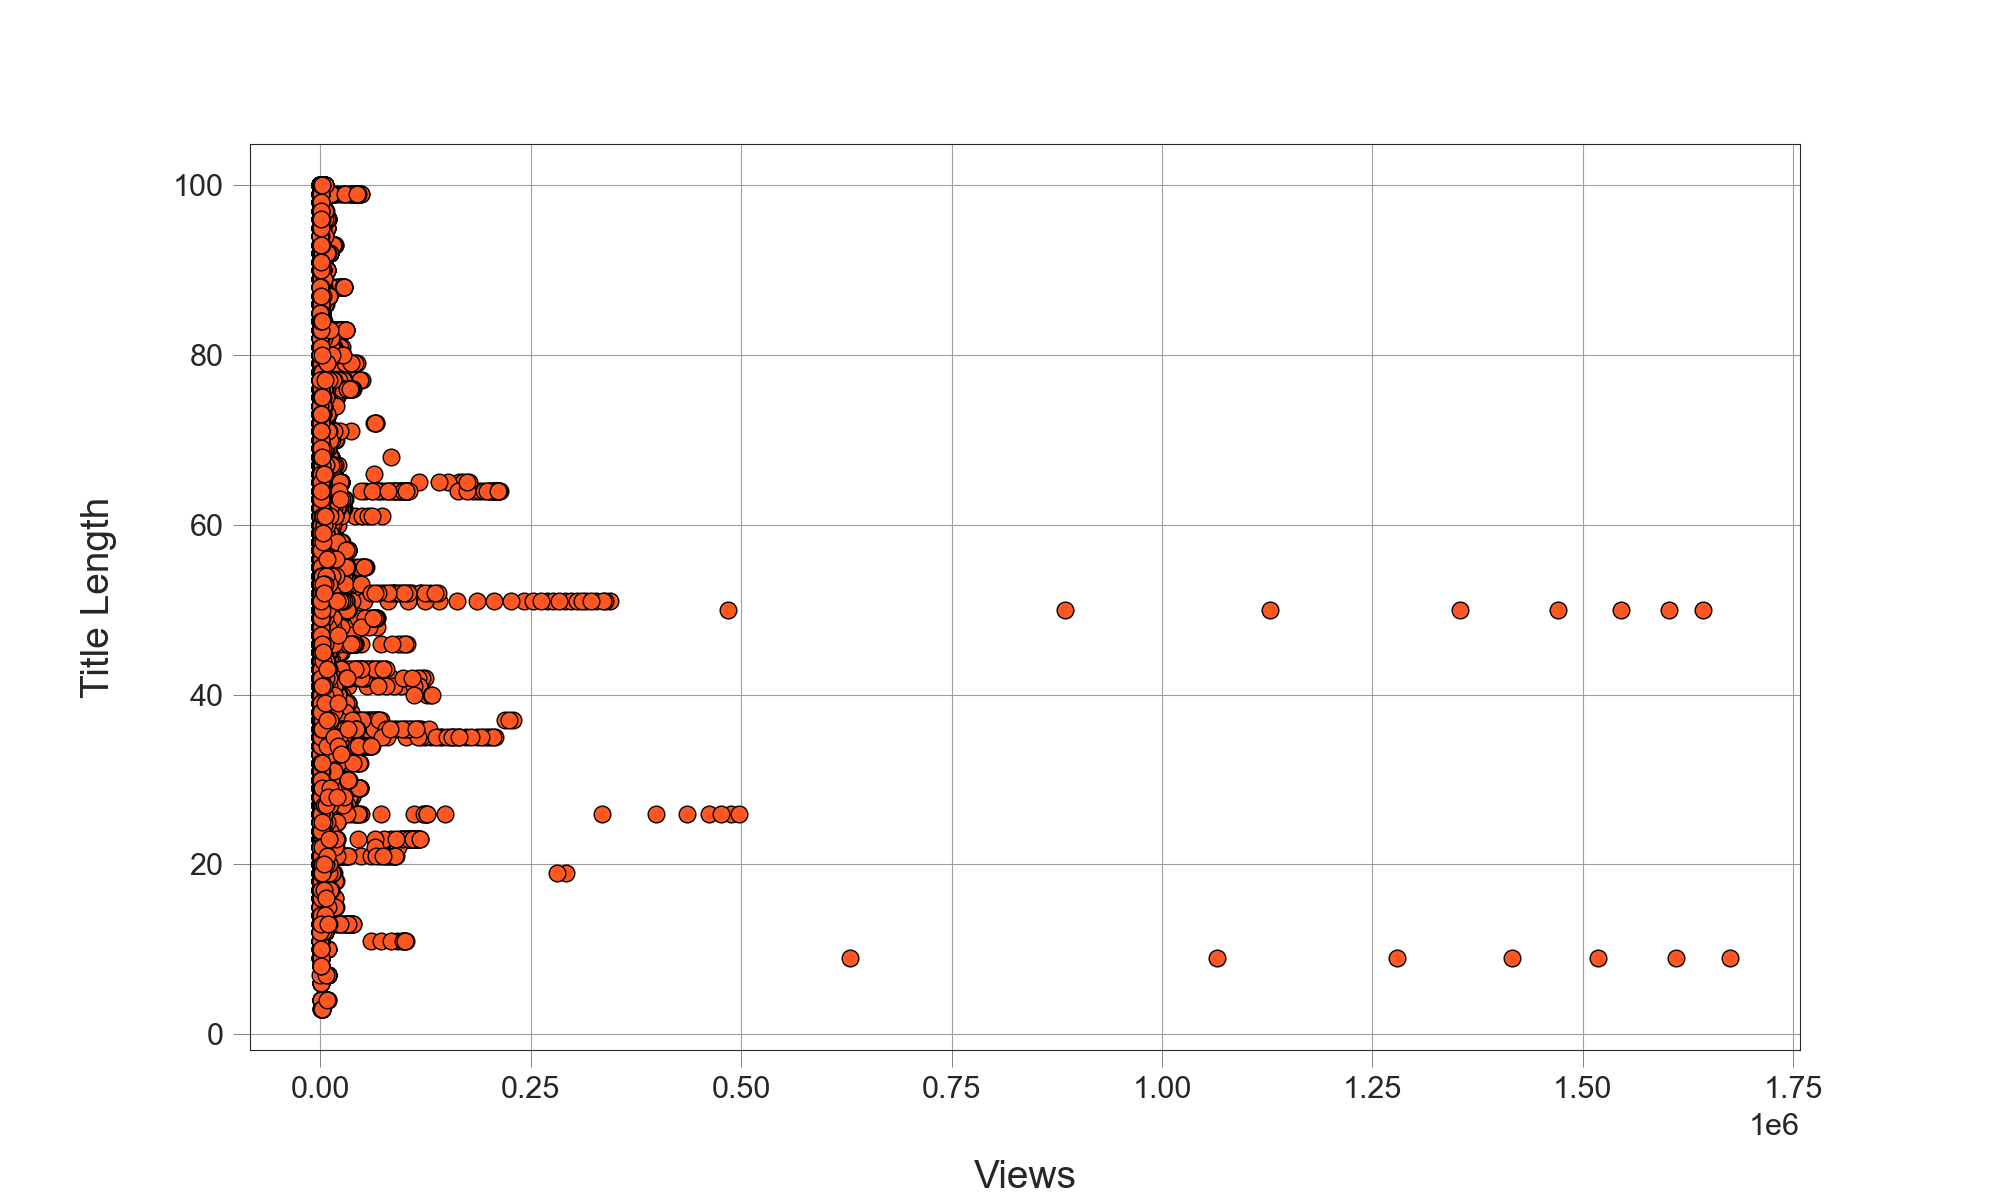

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
_ = plt.scatter( x=df['dislikes'],y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Title Length", xlabel="Views")

### category_title 

In [13]:
#  3、Which category_title have the largest number of trending videos?
cdf = df.groupby("category_title").size().reset_index(name="category_count") \
    .sort_values("category_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(x="category_count", y="category_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of category", ylabel="Category Title")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


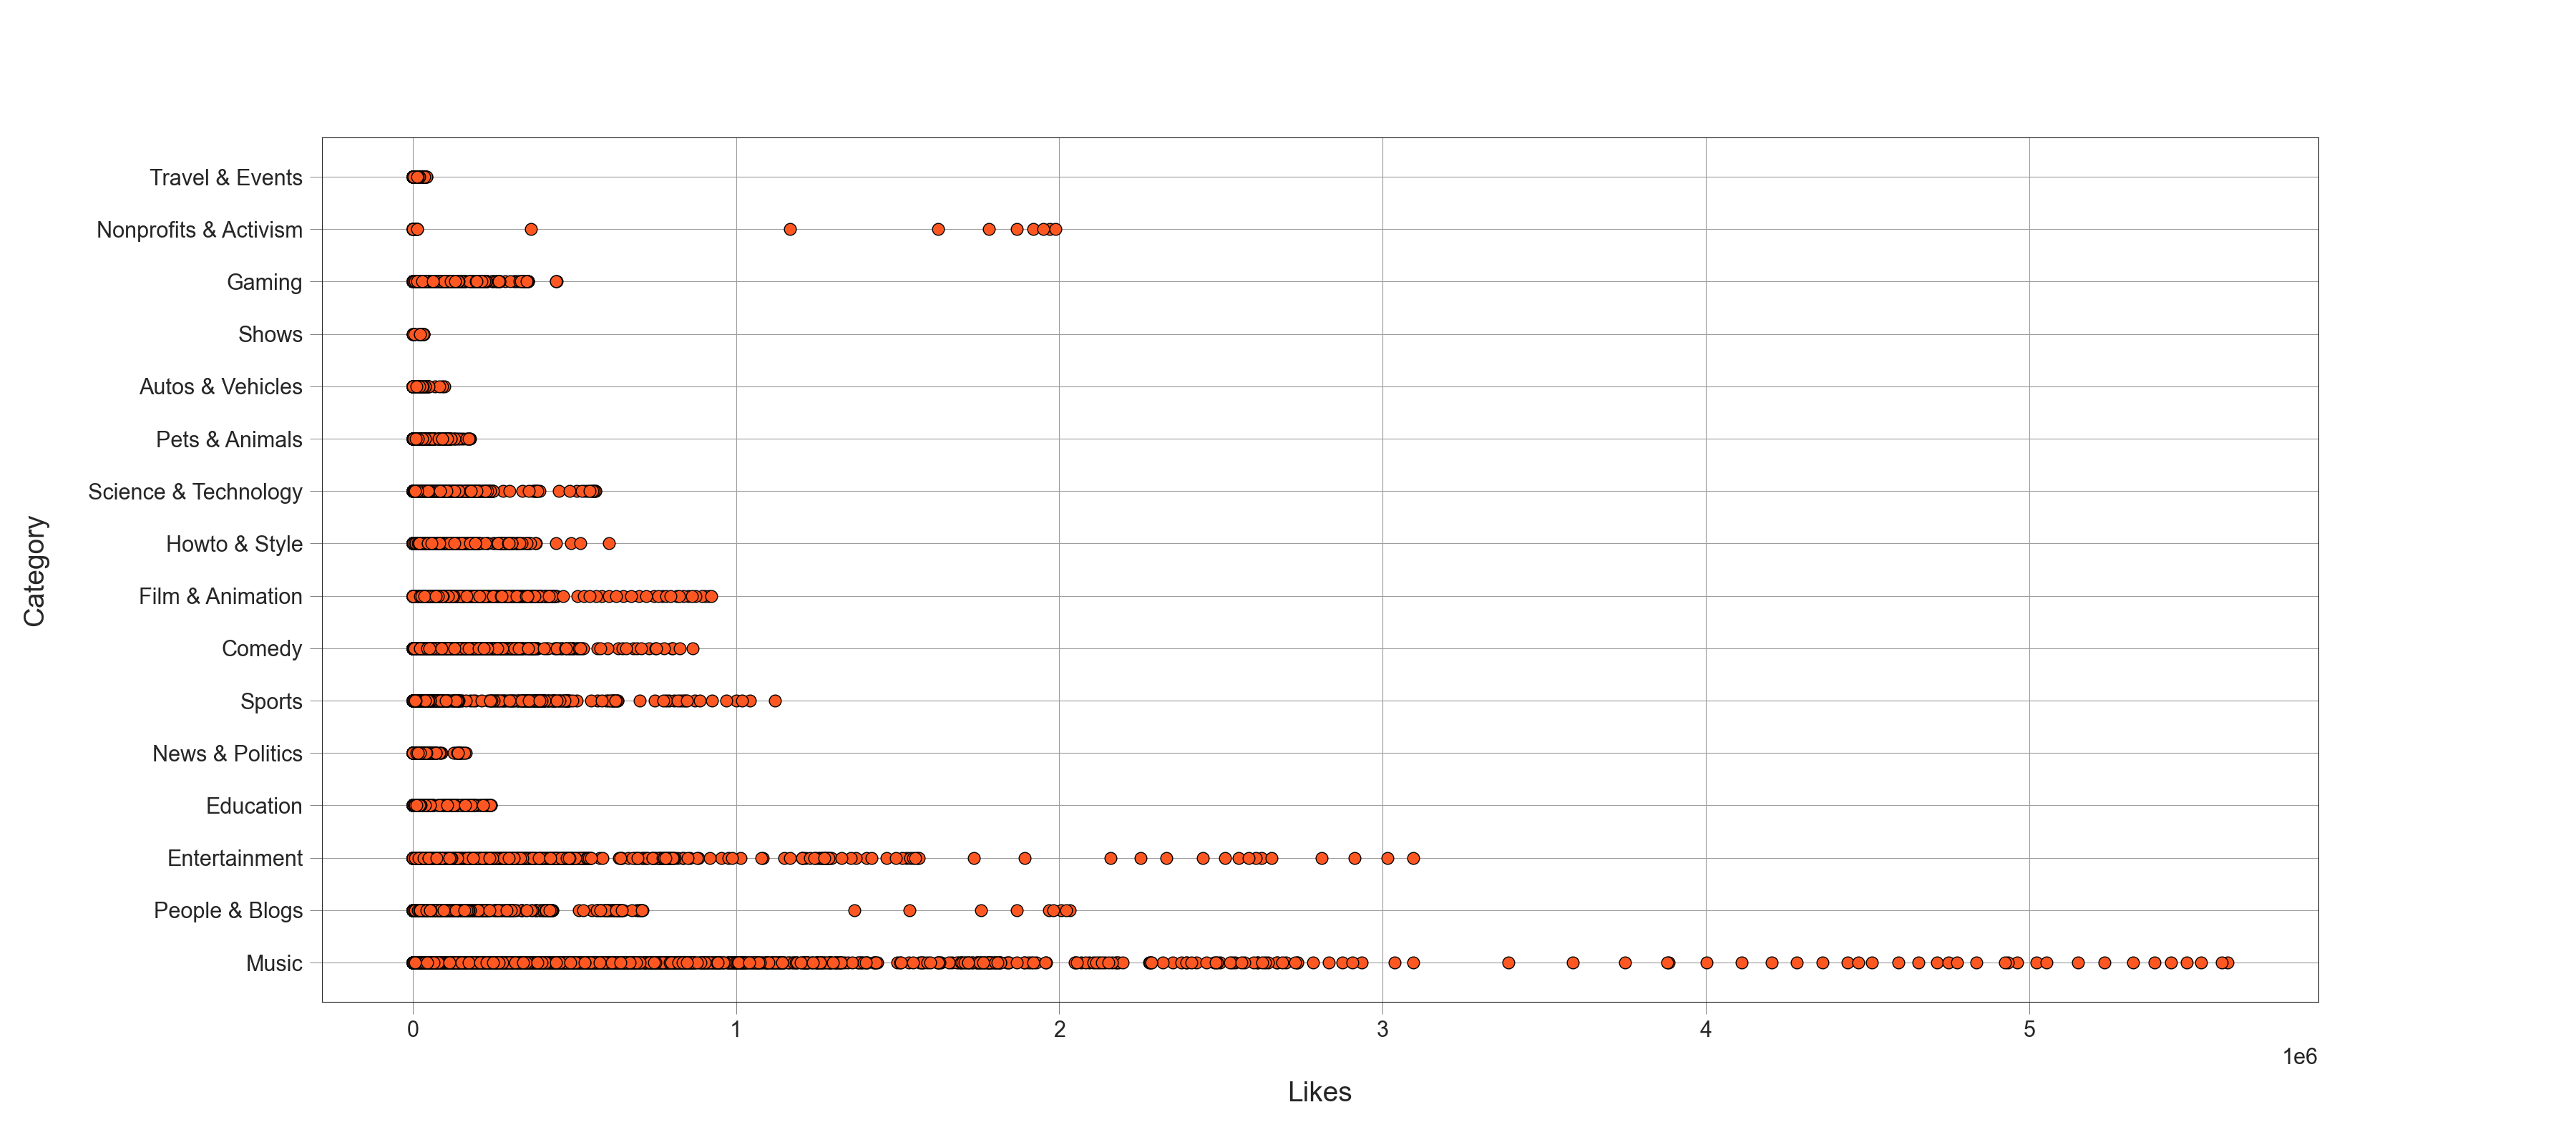

In [14]:
# visualize the relationship between category_title and likes
fig, ax = plt.subplots(figsize=(18,8))
_ = plt.scatter( x=df['likes'],y=df['category_title'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Category", xlabel="Likes")

<IPython.core.display.Javascript object>


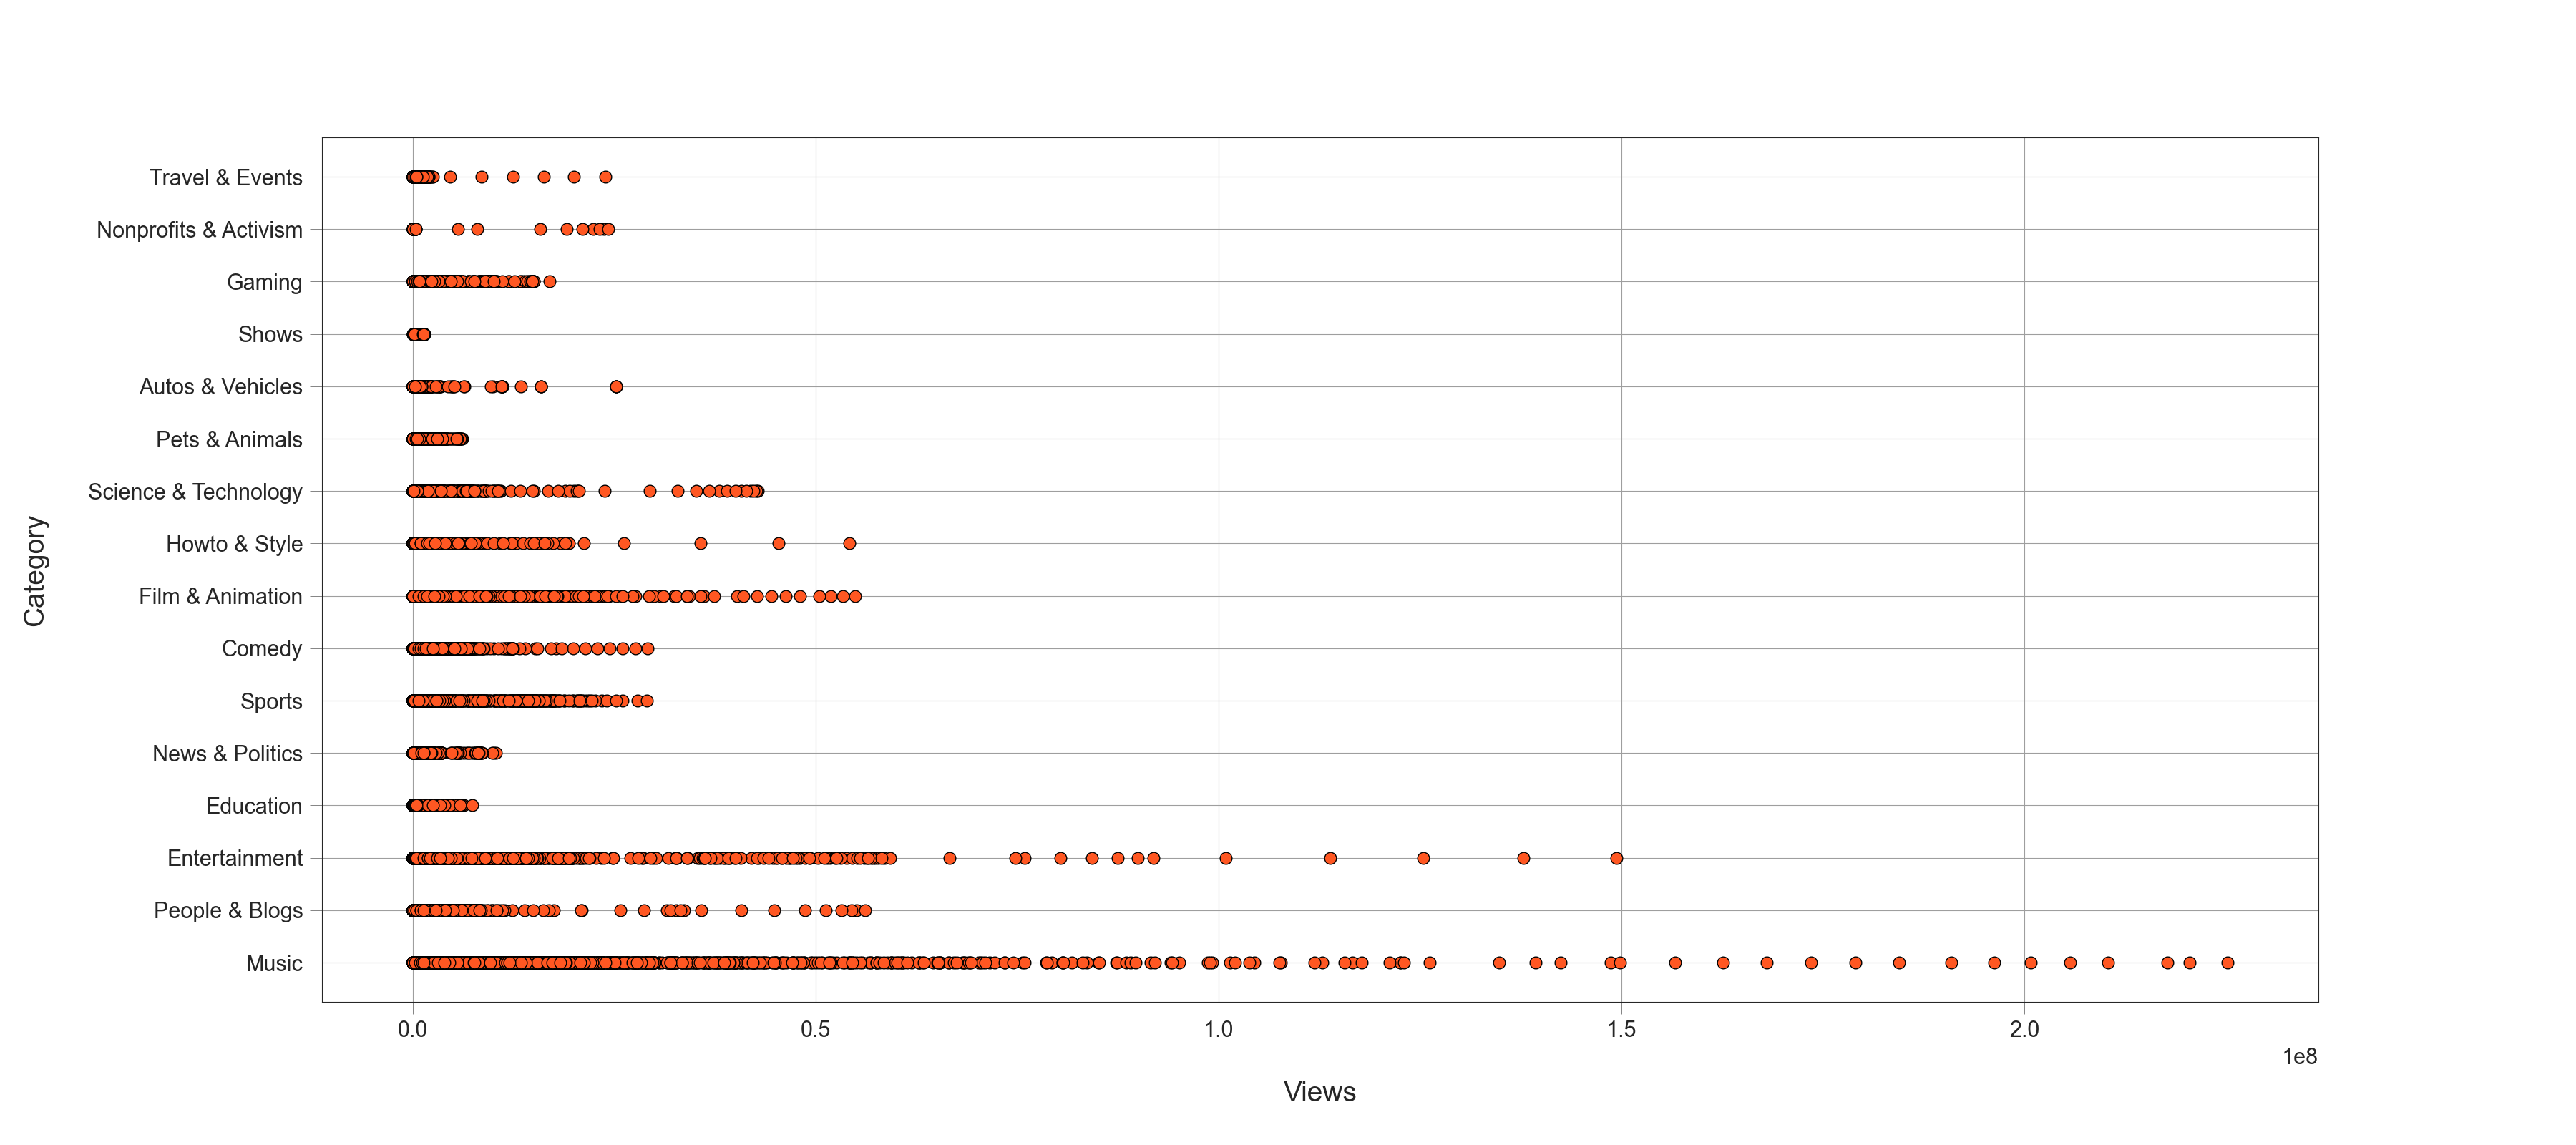

In [15]:
# visualize the relationship between category_title and views
fig, ax = plt.subplots(figsize=(18,8))
_ = plt.scatter( x=df['views'],y=df['category_title'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Category", xlabel="Views")

### publish_time

In [16]:
# Trending videos and their publishing time
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

<IPython.core.display.Javascript object>


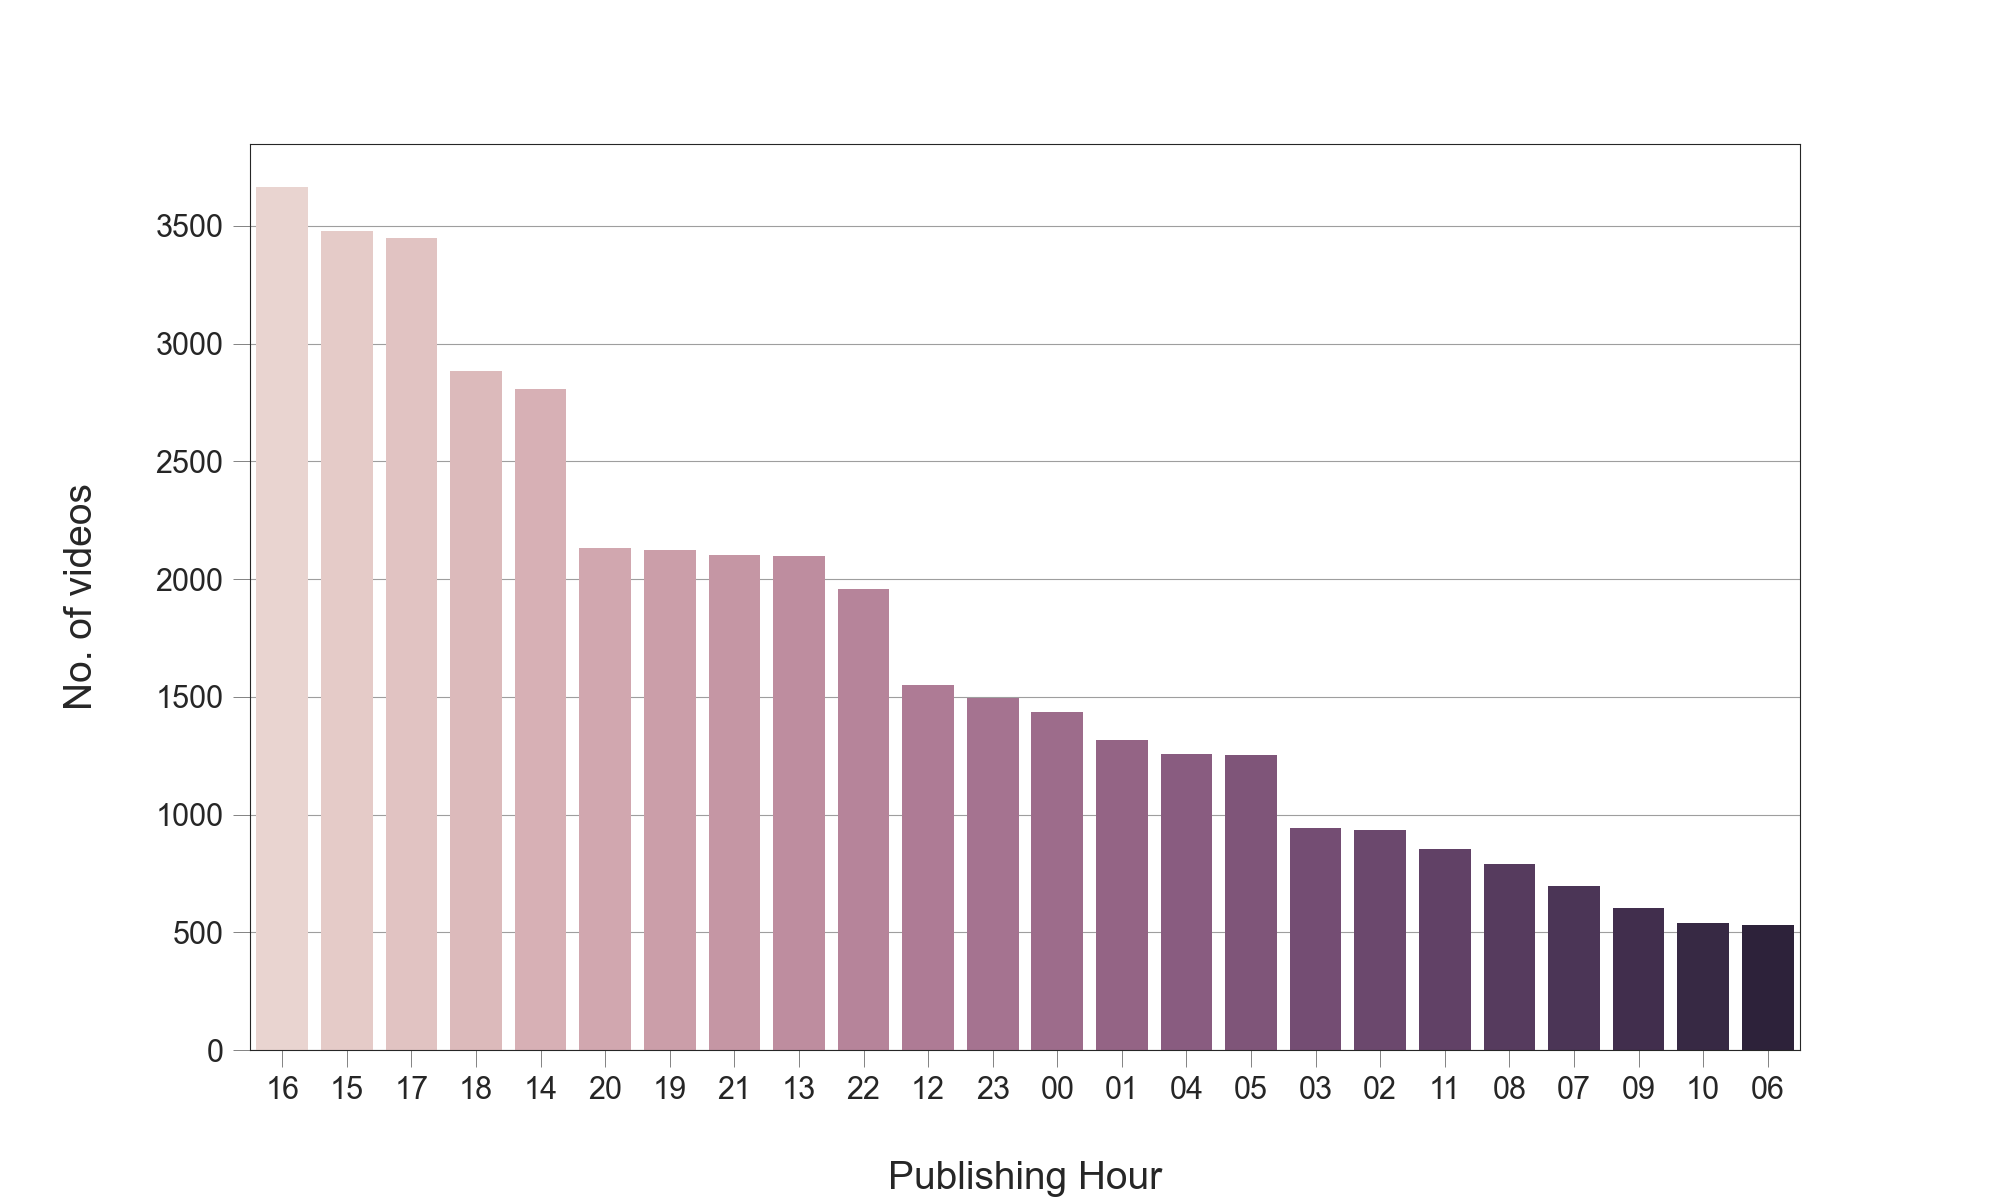

In [17]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

### correlation

In [18]:
# correlation table
df.corr()

category_id  views  likes  dislikes  comment_count
category_id           1.00  -0.17  -0.17     -0.03          -0.08
views                -0.17   1.00   0.85      0.47           0.62
likes                -0.17   0.85   1.00      0.45           0.80
dislikes             -0.03   0.47   0.45      1.00           0.70
comment_count        -0.08   0.62   0.80      0.70           1.00

In [22]:
df.describe()

category_id        views      likes   dislikes  comment_count  \
count     40898.00     40898.00   40898.00   40898.00       40898.00   
mean         19.97   2360849.60   74277.06    3711.99        8449.17   
std           7.57   7397962.93  229007.48   29047.29       37452.69   
min           1.00       549.00       0.00       0.00           0.00   
25%          17.00    242119.50    5417.00     202.00         613.00   
50%          24.00    681090.50   18071.50     630.00        1855.00   
75%          25.00   1821942.50   55338.75    1936.00        5752.75   
max          43.00 225211923.00 5613827.00 1674420.00     1361580.00   

       title_length  
count      40898.00  
mean          48.58  
std           19.62  
min            3.00  
25%           34.00  
50%           46.00  
75%           61.00  
max          100.00

<IPython.core.display.Javascript object>


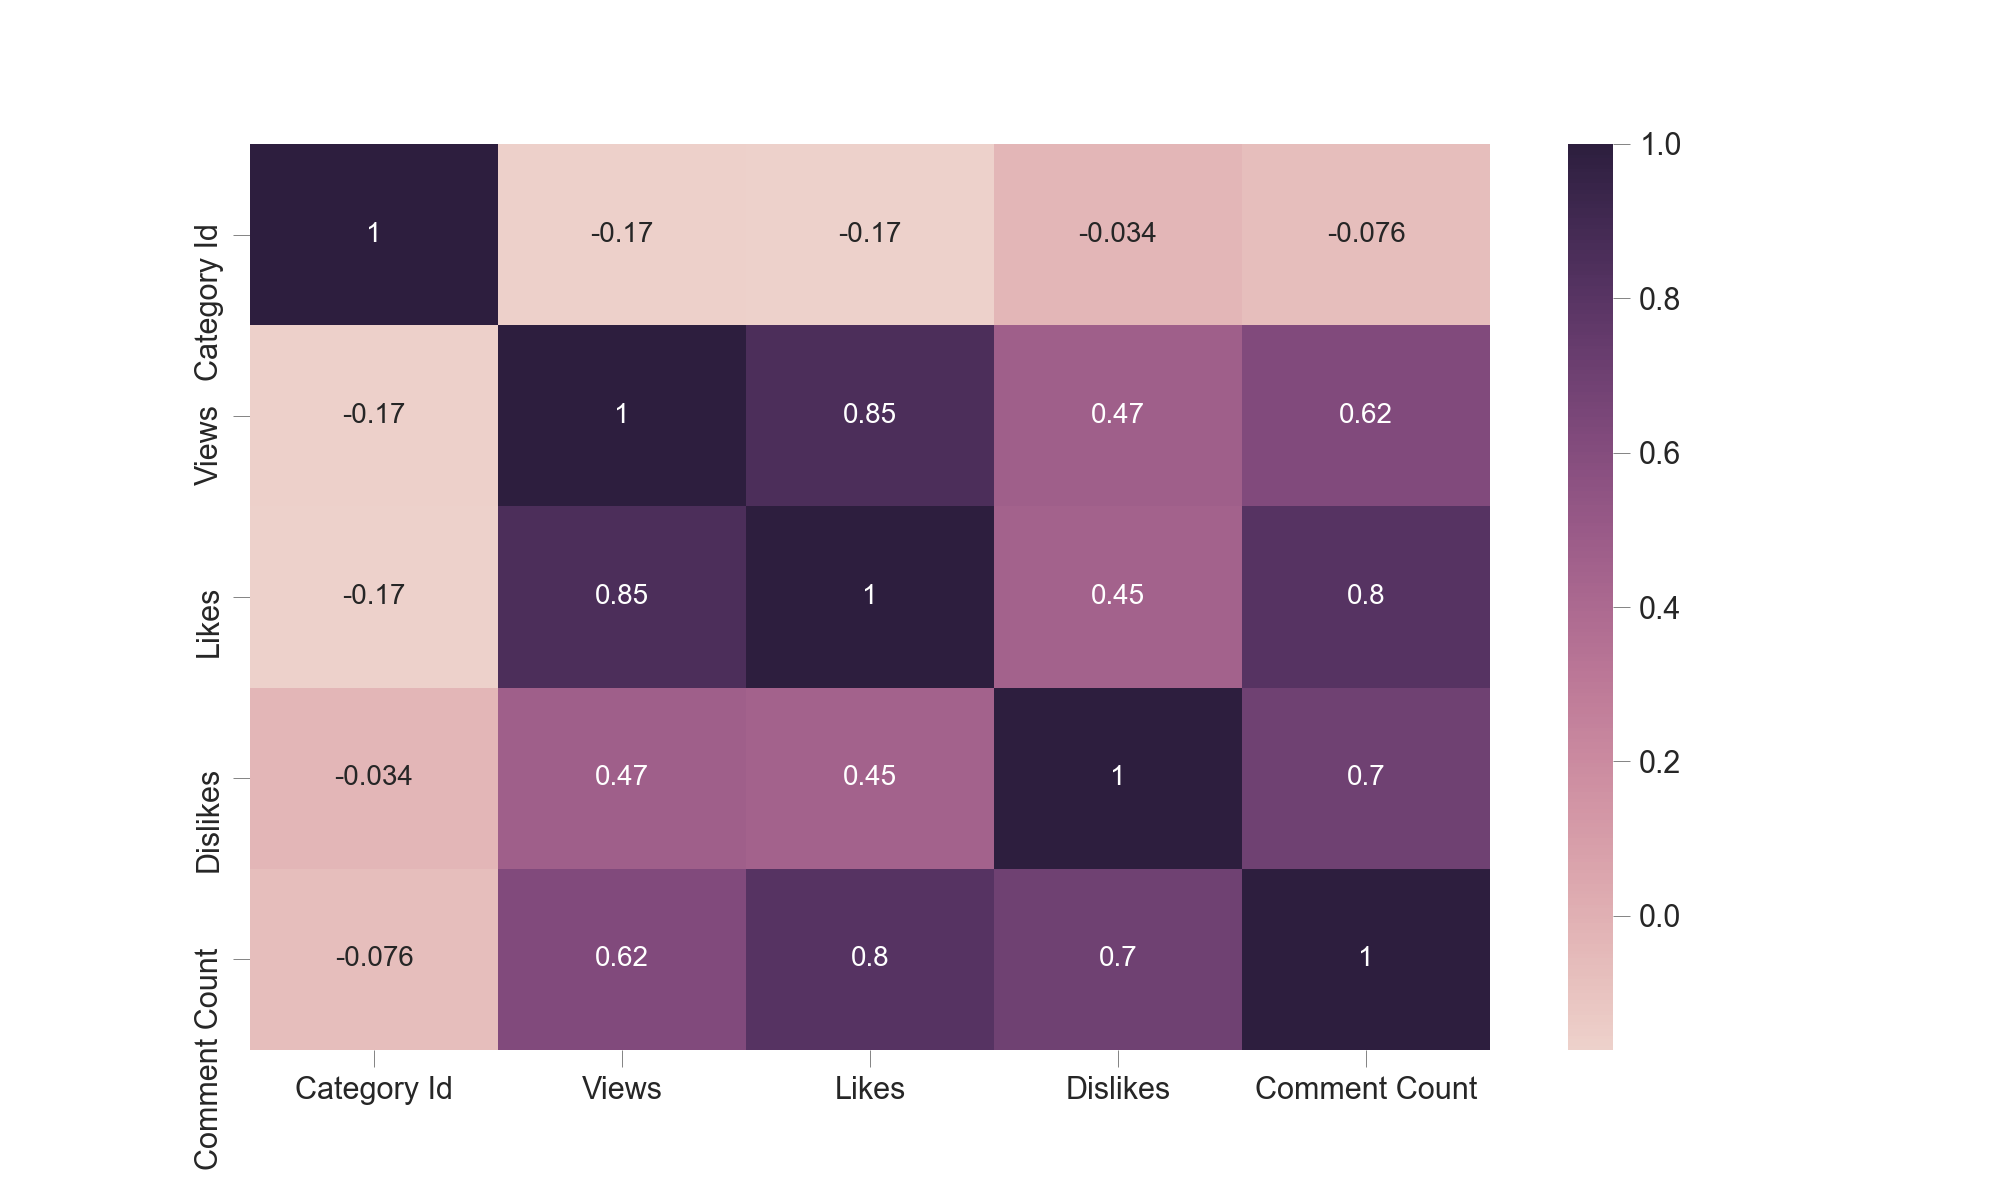

In [19]:
# visualize the correlation table
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)